<a href="https://colab.research.google.com/github/CodeCraftTejas/OIBSIP/blob/main/Task3_OIBSIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [5]:
file_path = "/content/drive/My Drive/Colab Notebooks/car data.csv"
df = pd.read_csv(file_path)

print("📄 Dataset Preview:")
print(df.head())


📄 Dataset Preview:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [6]:
# Convert 'Year' to 'Car_Age'
current_year = 2025
df['Car_Age'] = current_year - df['Year']
df.drop('Year', axis=1, inplace=True)

# Drop 'Car_Name' if exists
if 'Car_Name' in df.columns:
    df.drop('Car_Name', axis=1, inplace=True)

# Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
    print(f"Encoded: {col}")


Encoded: Fuel_Type
Encoded: Selling_type
Encoded: Transmission


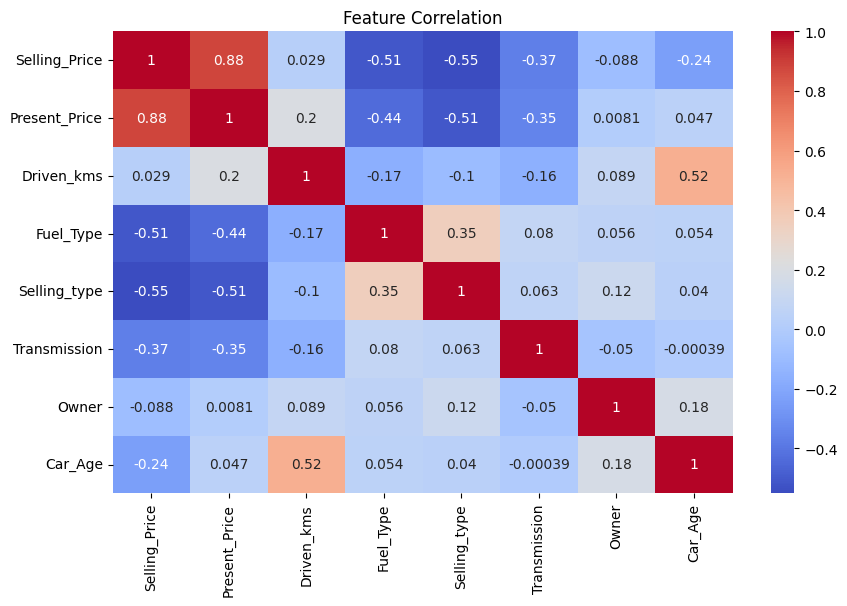

In [7]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [8]:
# Features & Target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [9]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"✅ R² Score: {r2:.4f}")
print(f"📉 Mean Absolute Error: {mae:.2f}")


✅ R² Score: 0.9593
📉 Mean Absolute Error: 0.64


In [11]:
from sklearn.metrics import r2_score

accuracy_r2 = r2_score(y_test, y_pred) * 100
print(f"🎯 R²-based Accuracy: {accuracy_r2:.2f}%")


🎯 R²-based Accuracy: 95.93%


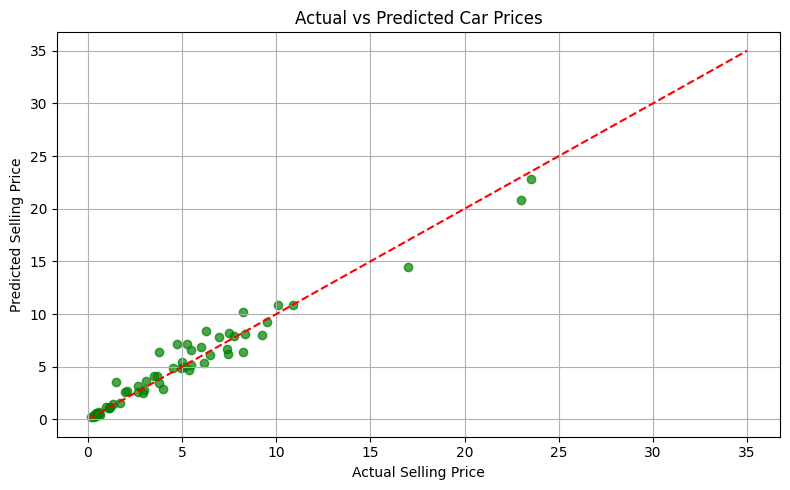

In [12]:
# Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


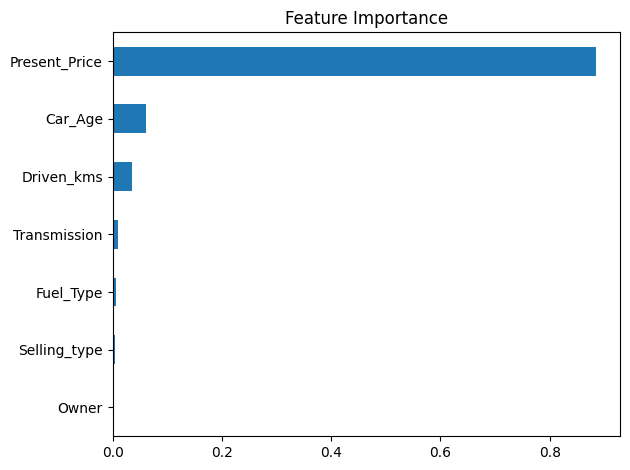

In [13]:
# Show feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', title='Feature Importance')
plt.tight_layout()
plt.show()
